In [36]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

In [37]:
import numpy as np

class Learner():
    def __init__(self):
        self.n_arms = 10
        self.bid = np.linspace(1.0, 10.0, self.n_arms)
        
        self.t = 0 
        
        
        self.rewards_per_arm = x = [[] for i in range(self.n_arms)]
        self.collected_rewards = []
    
    def update_observations(self, pulled_arm, reward):
        self.rewards_per_arm[pulled_arm].append(reward)
        self.collected_rewards.append(reward*10000)

class TS_Learner(Learner):
    def __init__(self):
        super().__init__()
        #Mean and Std
        self.normal_parameters = np.zeros((self.n_arms, 2))

    def pull_arm(self):
        if self.t < self.n_arms: return self.t
        return np.argmax(np.random.normal(self.normal_parameters[: , 0], self.normal_parameters[:, 1]))

    def update(self, pulled_arm, reward):
        self.t += 1
        times_pulled = max(1, len(self.rewards_per_arm[pulled_arm]))
        self.update_observations(pulled_arm, reward)
        #Empirical mean
        self.normal_parameters[pulled_arm, 0] = (self.normal_parameters[pulled_arm, 0] * (times_pulled - 1) + reward ) / times_pulled
        #Empirical std
        self.normal_parameters[pulled_arm, 1] = np.sqrt(sum((self.normal_parameters[pulled_arm, 0] - self.rewards_per_arm[pulled_arm])**2)/times_pulled)


In [38]:
opt_bids = [3.9416202240277745 , 3.0,  4.0]
opt_price = 7

In [39]:
from environment import Environment
from tqdm import tqdm

price = 5.0

T = 365
env = Environment()
regret = []
ts_learner = TS_Learner()
ts_rewards_per_experiment = np.ndarray([])

regret=[]

for t in tqdm(range(T)):
    #TS learner 
    bid = ts_learner.pull_arm()
    bids = [bid,bid,bid]
    reward = env.round(bids,price)
    ts_learner.update(bid, sum(reward)/10000)

    regret.append(sum(env.round(opt_bids, opt_price, noise = False)) - sum(reward))



100%|██████████| 365/365 [00:00<00:00, 543.65it/s]


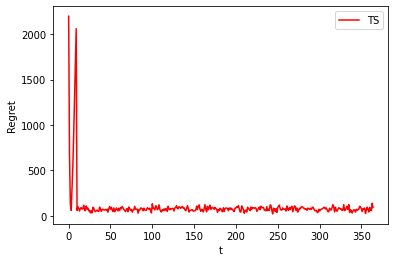

In [40]:
import matplotlib.pyplot as plt 

plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(regret , 'r')
plt.legend(["TS" ])
plt.show()

In [41]:
regret[-10:]

[24.146768363409592,
 63.03094134391222,
 93.71893564055017,
 70.4785488397315,
 40.95795745801888,
 92.97356965138533,
 62.227045240510506,
 56.25269505707183,
 138.0217241883488,
 91.40133784730506]